# Lab | Cleaning numerical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder.

### 1. Import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

### 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.

In [2]:
customer_df = pd.read_csv('/Users/silvia/lab-cleaning-numerical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

### 3. First look at its main features (head, shape, info).

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

### 4. Rename the columns so they follow the PE8 (snake case).

In [6]:
customer_df.columns = [column.lower().replace(' ', '_') for column in customer_df.columns]
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### 5. Change effective to date column to datetime format.

In [7]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

### 6. Check NaN values per column.

In [8]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

### 7. Define a function that differentiates between continuous and discrete variables. Hint: A number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.

In [9]:
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [10]:
#I will define a function to categorize: float64=continuous, int=discrete, object=categorical

def categorize(customer_df):
    col = customer_df.columns
    continuous = []
    discrete = []
    categorical = []
    
    for i in col:
        if customer_df.dtypes[i] == float:
            continuous.append(i)
    
        elif customer_df.dtypes[i] == int:
            discrete.append(i)
            
        else:
            categorical.append(i)
    
    return continuous, discrete, categorical

In [11]:
categorize(customer_df)

(['customer_lifetime_value', 'total_claim_amount'],
 ['income',
  'monthly_premium_auto',
  'months_since_last_claim',
  'months_since_policy_inception',
  'number_of_open_complaints',
  'number_of_policies'],
 ['customer',
  'state',
  'response',
  'coverage',
  'education',
  'effective_to_date',
  'employmentstatus',
  'gender',
  'location_code',
  'marital_status',
  'policy_type',
  'policy',
  'renew_offer_type',
  'sales_channel',
  'vehicle_class',
  'vehicle_size'])

### 8. For the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

In [12]:
customer_df_cat = customer_df.select_dtypes('object')
customer_df_cat

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [13]:
#Conclusion: I don't see there is any column with text to be deleted. The only option I considered is to swift the vehible class column to 2,3,4 values to make it a numerical column. However, there is the SUV value and therefore is not possible to do it.

### 9. Get categorical features.

In [14]:
customer_df_cat

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


### 10. What should we do with the customer_id column?

In [15]:
#I will change it into Index


customer_df = customer_df.set_index('customer')
customer_df

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize


# Lab | Feature extraction

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

## 1. Open the categoricals variable we created before.

In [16]:
categoricals = customer_df.select_dtypes(np.object)
categoricals.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


## 2. Plot all the categorical variables with the proper plot. What can you see?

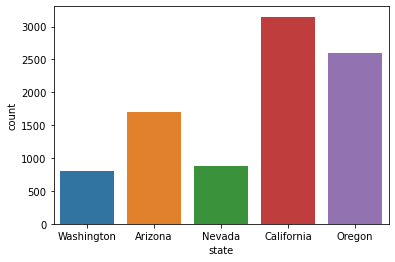

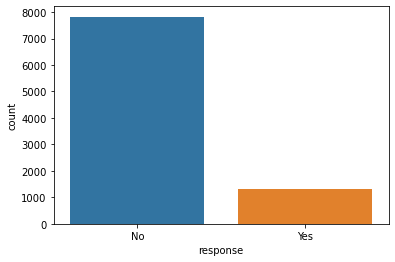

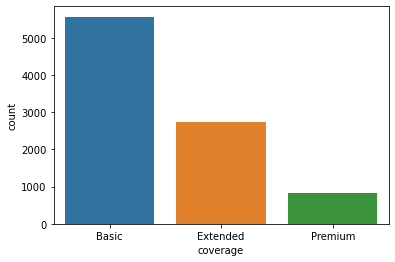

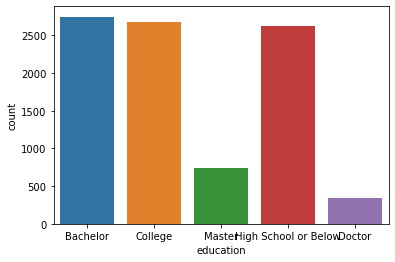

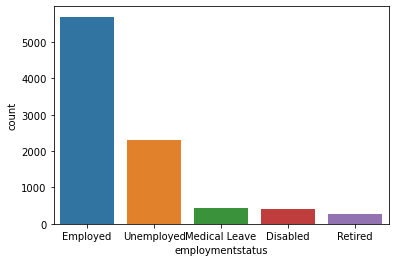

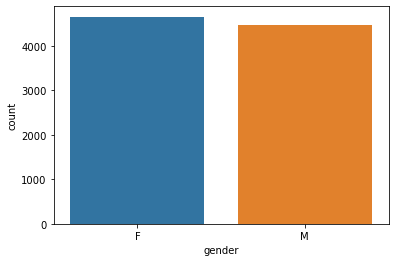

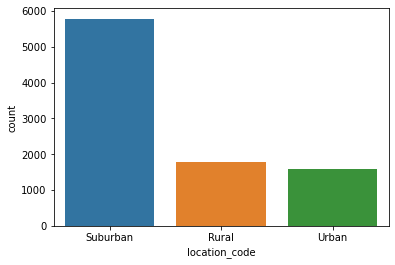

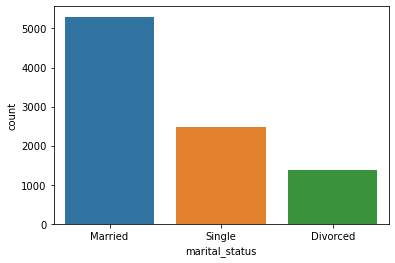

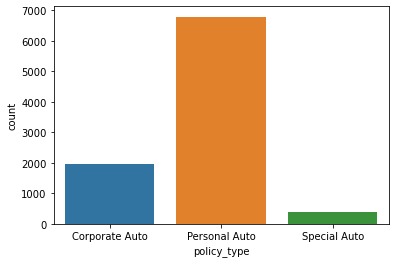

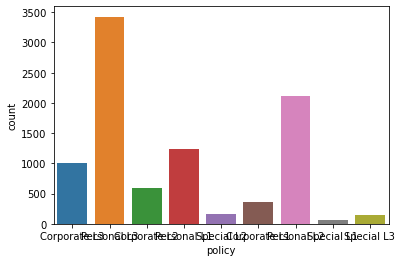

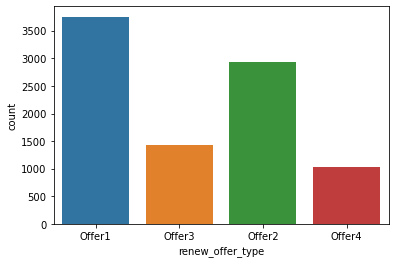

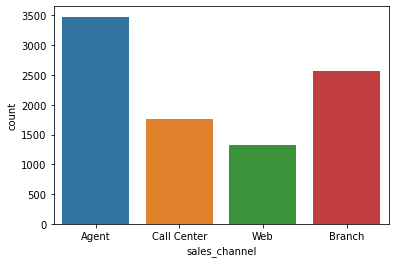

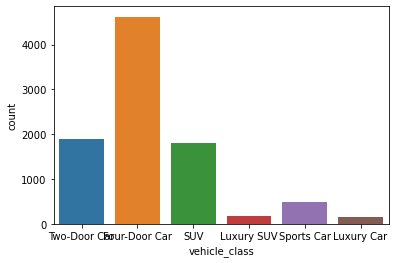

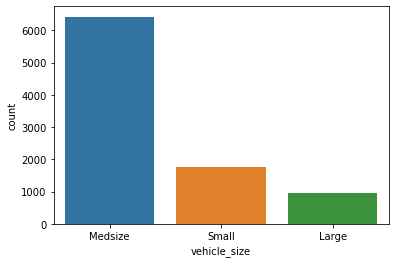

In [17]:
for column in categoricals.columns:
    sns.countplot(column, data = categoricals)
    plt.show()

Main observations: 
1) the majority of customers are employed
2) the majority of customers life in suburban areas
3) the majority of customers are married
4) the majority of customers have a personal auto (policy)
5) the majority of cars of customers are medium size

## 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [18]:
categoricals.head(20)

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
OC83172,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize
XZ87318,Oregon,Yes,Basic,College,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
CF85061,Arizona,No,Premium,Master,Unemployed,M,Urban,Single,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
DY87989,Oregon,Yes,Basic,Bachelor,Medical Leave,M,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize


In [19]:
# We observe that having the columns policy_type and policy is redundant and therefore we should drop one of those. I will remove policy_type column

categoricals = categoricals.drop(['policy_type'], axis = 1)

## 4. Plot time variable. Can you extract something from it?

<AxesSubplot:xlabel='effective_to_date', ylabel='total_claim_amount'>

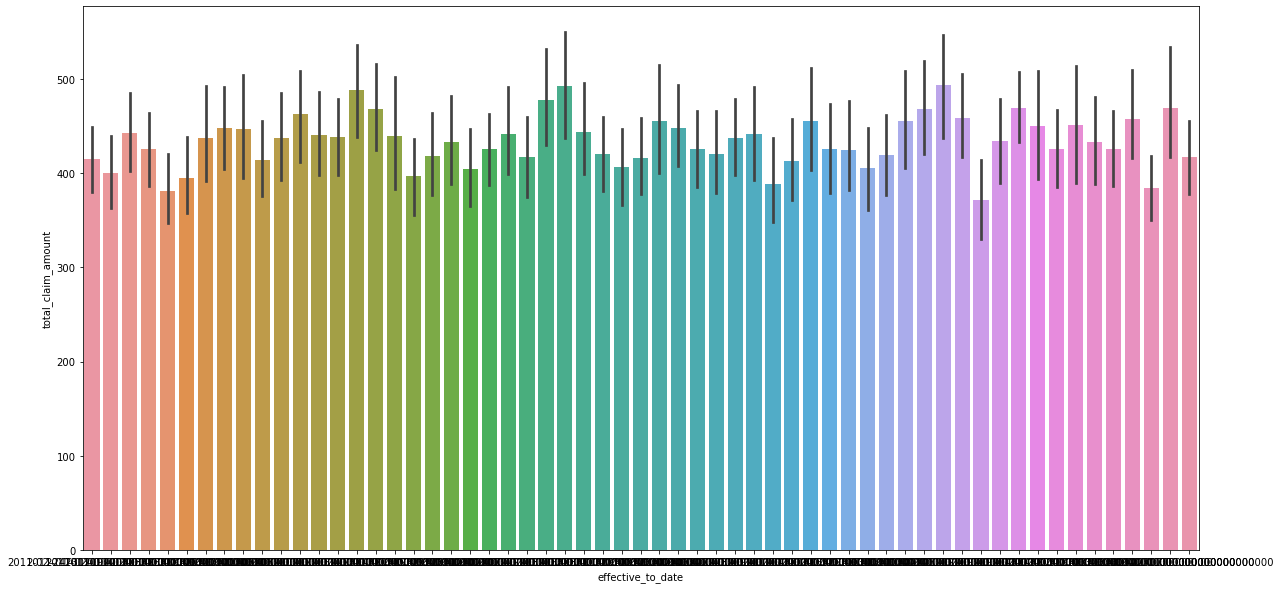

In [20]:
plt.figure(figsize=(20,10))
sns.barplot(data=customer_df, x="effective_to_date", y="total_claim_amount")

# Lab | Data cleaning and wrangling

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

### 1. We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

customer_lifetime_value


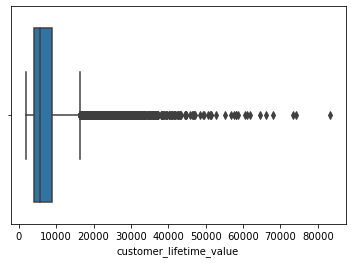

income


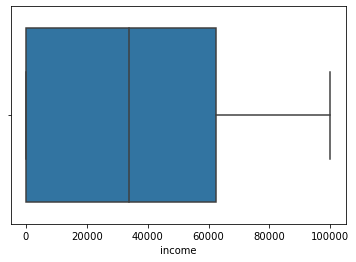

monthly_premium_auto


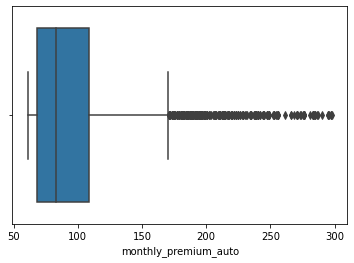

months_since_last_claim


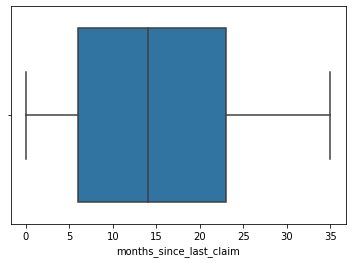

months_since_policy_inception


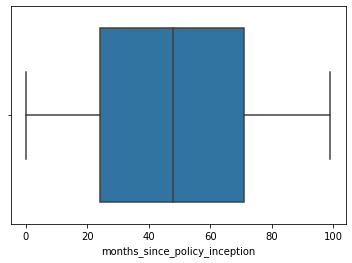

number_of_open_complaints


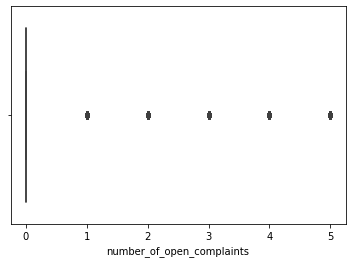

number_of_policies


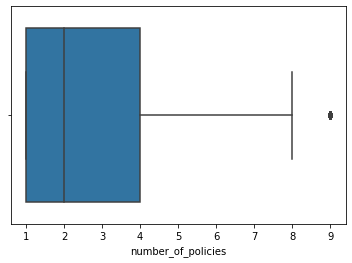

total_claim_amount


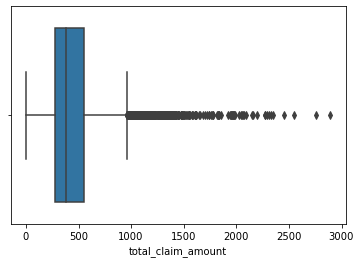

In [21]:
for cols in customer_df.select_dtypes(np.number):
    sns.boxplot(customer_df[cols])
    print(cols)
    plt.show()

In [22]:
def remove_outliers(df, threshold=1.5, in_columns=[], skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(df[column],75)
            lower = np.percentile(df[column],25)
            iqr = upper - lower
            upper_limit = upper + (threshold * iqr)
            lower_limit = lower - (threshold * iqr)
            df.loc[df[column] > upper_limit, column] = upper_limit
            df.loc[df[column] < lower_limit, column] = lower_limit
    return df

In [23]:
customer_df = remove_outliers(customer_df, threshold=1.5, in_columns=customer_df.select_dtypes(np.number).columns, skip_columns=['number_of_open_complaints'])

customer_lifetime_value


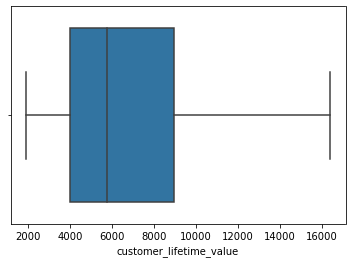

income


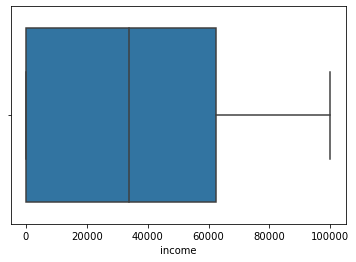

monthly_premium_auto


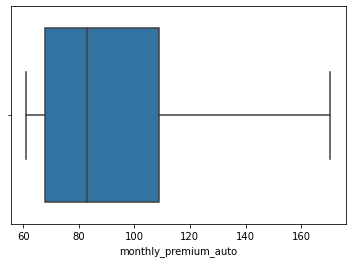

months_since_last_claim


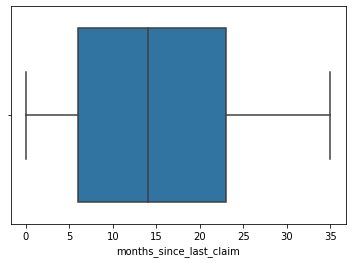

months_since_policy_inception


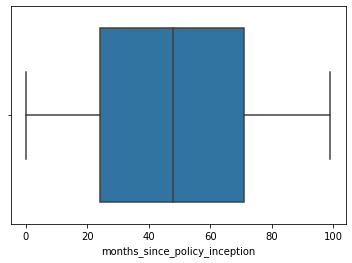

number_of_open_complaints


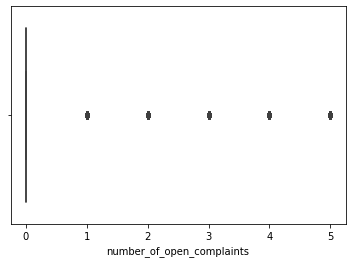

number_of_policies


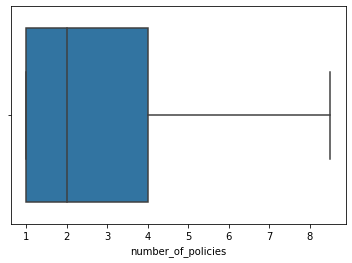

total_claim_amount


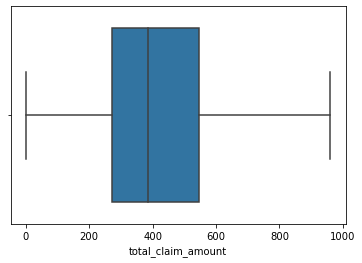

In [24]:
for cols in customer_df.select_dtypes(np.number):
    sns.boxplot(customer_df[cols])
    print(cols)
    plt.show()

### 2. Create a copy of the dataframe for the data wrangling.

In [25]:
df_copy = customer_df.copy()
df_copy.shape

(9134, 23)

### 3. Normalize the continuous variables. You can use any one method you want.

In [26]:
numericals = customer_df.select_dtypes(np.number)
numericals

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer,,,,,,,,
BU79786,2763.519279,56274.0,69.0,32.0,5.0,0,1.0,384.811147
QZ44356,6979.535903,0.0,94.0,13.0,42.0,0,8.0,960.399730
AI49188,12887.431650,48767.0,108.0,18.0,38.0,0,2.0,566.472247
WW63253,7645.861827,0.0,106.0,18.0,65.0,0,7.0,529.881344
HB64268,2813.692575,43836.0,73.0,12.0,44.0,0,1.0,138.130879
...,...,...,...,...,...,...,...,...
LA72316,16414.039912,71941.0,73.0,18.0,89.0,0,2.0,198.234764
PK87824,3096.511217,21604.0,79.0,14.0,28.0,0,1.0,379.200000
TD14365,8163.890428,0.0,85.0,9.0,37.0,3,2.0,790.784983


In [27]:
transformer = StandardScaler().fit(numericals)
x_standardized = transformer.transform(numericals)

df_numericals = pd.DataFrame(x_standardized)
df_numericals

,0,1,2,3,4,5,6,7
0,-1.044476,0.612827,-0.791655,1.678099,-1.543287,-0.422250,-0.832582,-0.139489
1,-0.048694,-1.239617,0.088171,-0.208186,-0.217334,-0.422250,2.166327,2.256390
2,1.346693,0.365710,0.580874,0.288205,-0.360680,-0.422250,-0.404167,0.616673
3,0.108685,-1.239617,0.510488,0.288205,0.606907,-0.422250,1.737911,0.464363
4,-1.032626,0.203390,-0.650882,-0.307465,-0.145661,-0.422250,-0.832582,-1.166292
...,...,...,...,...,...,...,...,...
9129,2.179644,1.128558,-0.650882,0.288205,1.466984,-0.422250,-0.404167,-0.916110
9130,-0.965827,-0.528450,-0.439724,-0.108908,-0.719046,-0.422250,-0.832582,-0.162845
9131,0.231039,-1.239617,-0.228566,-0.605299,-0.396517,2.873245,-0.404167,1.550371
9132,0.080007,-0.517356,0.158557,1.876656,-1.614960,-0.422250,0.024249,1.135850


In [28]:
numericals.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [29]:
numericals_columns = ['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount']

df_numericals.columns = numericals.columns
df_numericals

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,-1.044476,0.612827,-0.791655,1.678099,-1.543287,-0.422250,-0.832582,-0.139489
1,-0.048694,-1.239617,0.088171,-0.208186,-0.217334,-0.422250,2.166327,2.256390
2,1.346693,0.365710,0.580874,0.288205,-0.360680,-0.422250,-0.404167,0.616673
3,0.108685,-1.239617,0.510488,0.288205,0.606907,-0.422250,1.737911,0.464363
4,-1.032626,0.203390,-0.650882,-0.307465,-0.145661,-0.422250,-0.832582,-1.166292
...,...,...,...,...,...,...,...,...
9129,2.179644,1.128558,-0.650882,0.288205,1.466984,-0.422250,-0.404167,-0.916110
9130,-0.965827,-0.528450,-0.439724,-0.108908,-0.719046,-0.422250,-0.832582,-0.162845
9131,0.231039,-1.239617,-0.228566,-0.605299,-0.396517,2.873245,-0.404167,1.550371
9132,0.080007,-0.517356,0.158557,1.876656,-1.614960,-0.422250,0.024249,1.135850


### 4. Encode the categorical variables

In [30]:
categoricals = df_copy.select_dtypes('object')

In [31]:
categoricals_encoded = pd.get_dummies(categoricals, drop_first=True)

### 5. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [32]:
date = pd.DataFrame(df_copy['effective_to_date'])

In [33]:
date['day'] = date['effective_to_date'].dt.day
date['month'] = date['effective_to_date'].dt.month
date['year'] = date['effective_to_date'].dt.year

In [34]:
date = date.drop(['effective_to_date'], axis=1)

### 6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [35]:
df_numericals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   float64
 2   monthly_premium_auto           9134 non-null   float64
 3   months_since_last_claim        9134 non-null   float64
 4   months_since_policy_inception  9134 non-null   float64
 5   number_of_open_complaints      9134 non-null   float64
 6   number_of_policies             9134 non-null   float64
 7   total_claim_amount             9134 non-null   float64
dtypes: float64(8)
memory usage: 571.0 KB


In [36]:
categoricals_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   state_California                9134 non-null   uint8
 1   state_Nevada                    9134 non-null   uint8
 2   state_Oregon                    9134 non-null   uint8
 3   state_Washington                9134 non-null   uint8
 4   response_Yes                    9134 non-null   uint8
 5   coverage_Extended               9134 non-null   uint8
 6   coverage_Premium                9134 non-null   uint8
 7   education_College               9134 non-null   uint8
 8   education_Doctor                9134 non-null   uint8
 9   education_High School or Below  9134 non-null   uint8
 10  education_Master                9134 non-null   uint8
 11  employmentstatus_Employed       9134 non-null   uint8
 12  employmentstatus_Medical Leave  9134 non-null   uint8
 13 